<a href="https://colab.research.google.com/github/SARU230/Matplot_lib_for-gromacs/blob/main/distance_and_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 46r_28_Z_XYZ.xvg to 46r_28_Z_XYZ.xvg
Enter the title for the plots: r-Z
Select the plots to generate:
1. Plot raw X, Y, and Z distances over time
2. Plot change in X, Y, and Z distances over time
3. Plot first derivative of X, Y, and Z distances over time
4. Plot histograms of raw X, Y, and Z distances
5. Plot histograms of change in X, Y, and Z distances
Enter your choices (comma-separated, e.g., 1,2,3): 1,2,3,4,5


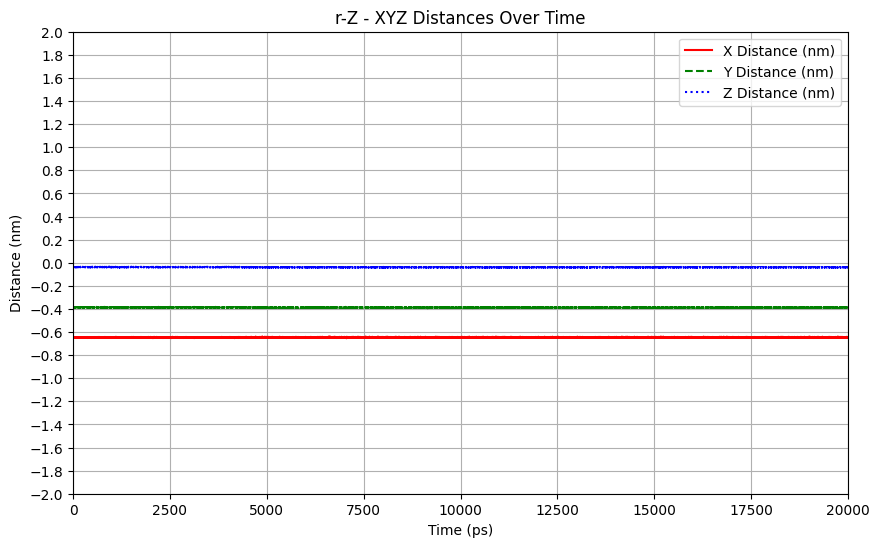

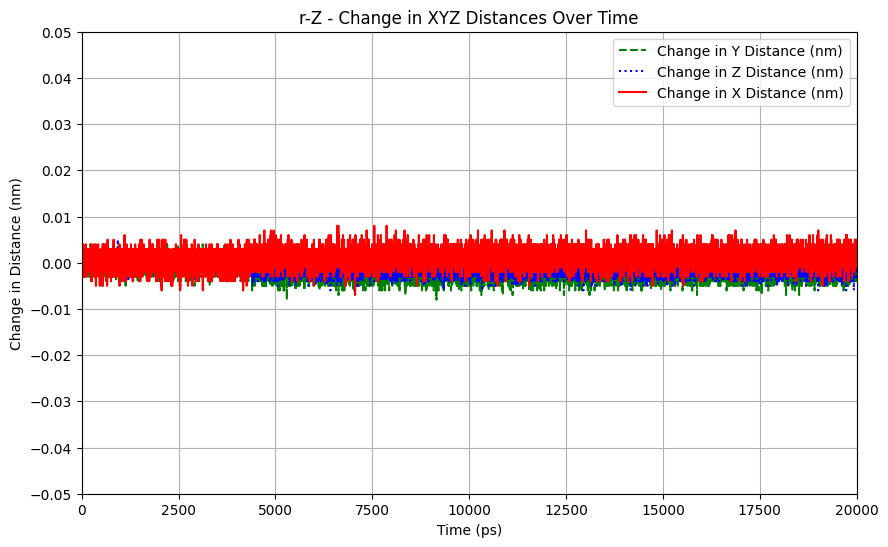

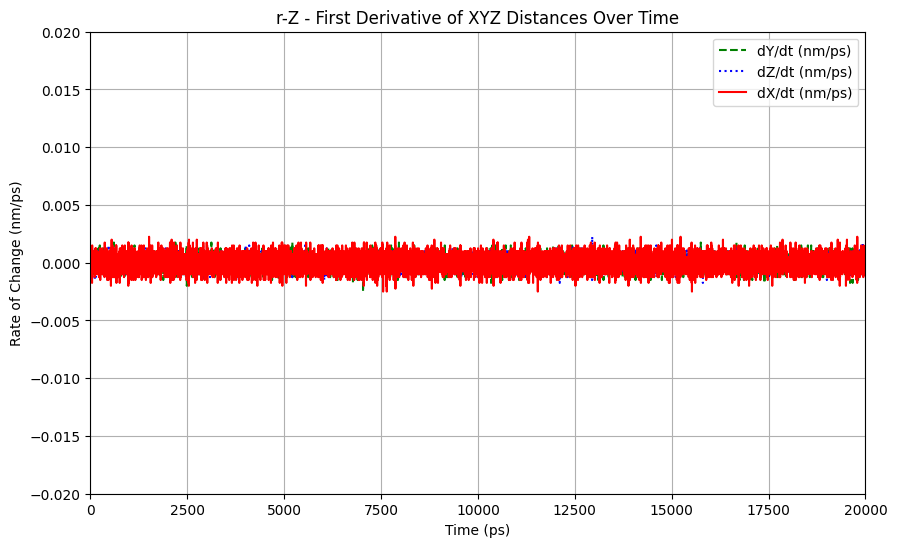

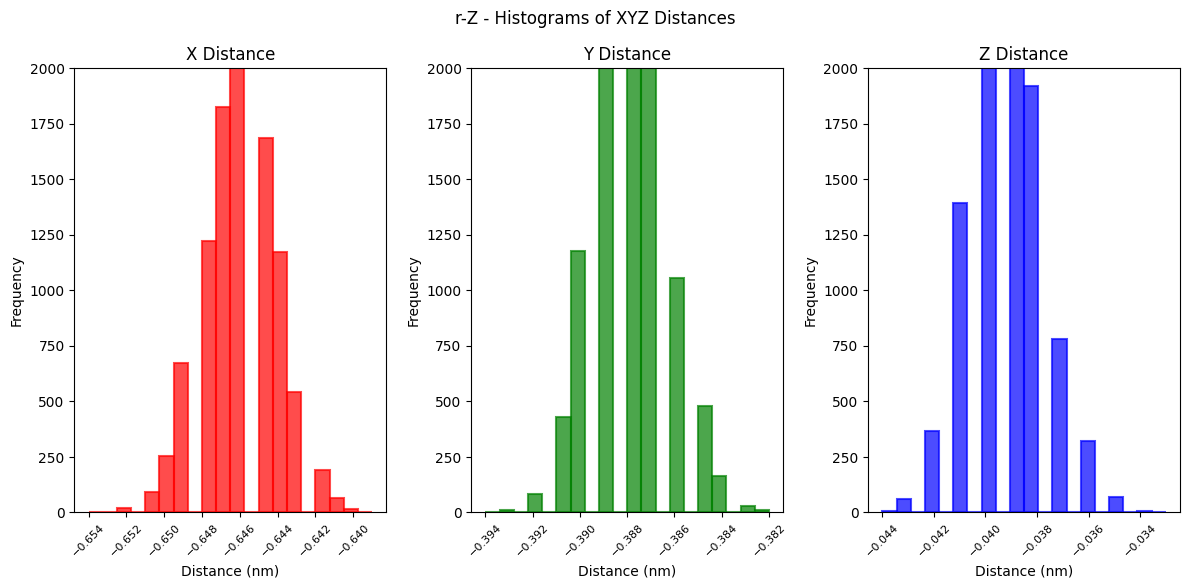

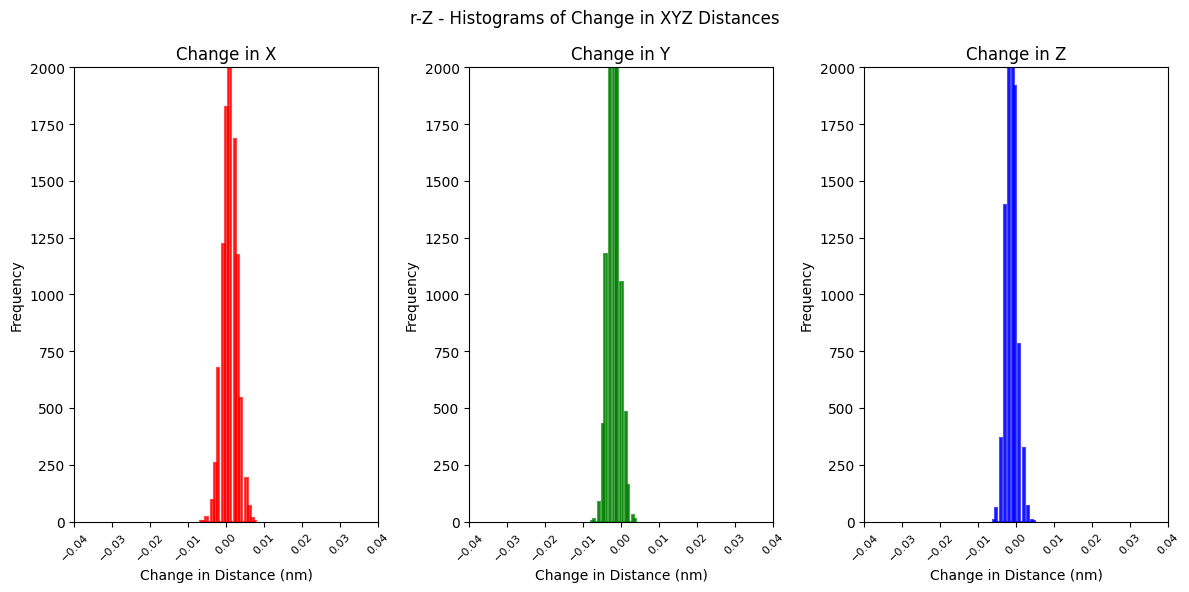

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from google.colab import files

def read_xvg(file_path):
    """
    Read an .xvg file and extract time, X, Y, and Z distances.
    """
    time = []
    x_dist = []
    y_dist = []
    z_dist = []

    with open(file_path, 'r') as file:
        for line in file:
            # Skip comments and headers
            if line.startswith('#') or line.startswith('@'):
                continue
            # Split the line into columns
            columns = line.split()
            if len(columns) == 4:  # Ensure there are 4 columns (time, X, Y, Z)
                time.append(float(columns[0]))
                x_dist.append(float(columns[1]))
                y_dist.append(float(columns[2]))
                z_dist.append(float(columns[3]))

    return np.array(time), np.array(x_dist), np.array(y_dist), np.array(z_dist)

def calculate_changes(x_dist, y_dist, z_dist):
    """
    Calculate the change in X, Y, and Z distances relative to t = 0.
    """
    x_change = x_dist - x_dist[0]
    y_change = y_dist - y_dist[0]
    z_change = z_dist - z_dist[0]
    return x_change, y_change, z_change

def calculate_derivatives(time, x_dist, y_dist, z_dist):
    """
    Calculate the first derivative of X, Y, and Z distances with respect to time.
    """
    dt = time[1] - time[0]  # Time step
    x_deriv = np.gradient(x_dist, dt)
    y_deriv = np.gradient(y_dist, dt)
    z_deriv = np.gradient(z_dist, dt)
    return x_deriv, y_deriv, z_deriv

def plot_xyz_distances(time, x_dist, y_dist, z_dist, title):
    """
    Plot X, Y, and Z distances over time with custom axis spacing.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(time, x_dist, label='X Distance (nm)', color='r', linestyle='-')
    plt.plot(time, y_dist, label='Y Distance (nm)', color='g', linestyle='--')
    plt.plot(time, z_dist, label='Z Distance (nm)', color='b', linestyle=':')
    plt.xlabel('Time (ps)')
    plt.ylabel('Distance (nm)')
    plt.title(f'{title} - XYZ Distances Over Time')
    plt.legend()
    plt.grid(True)

    # Set axis limits
    plt.xlim(0,20000)
    plt.ylim(-2,2)

    # Customize major tick spacing
    major_spacing_x = 2500  # Set major tick spacing for x-axis (e.g., 2500 ps)
    major_spacing_y = 0.2  # Set major tick spacing for y-axis (e.g., 0.01 nm)
    ax = plt.gca()  # Get the current axis
    ax.xaxis.set_major_locator(ticker.MultipleLocator(major_spacing_x))  # Set x-axis spacing
    ax.yaxis.set_major_locator(ticker.MultipleLocator(major_spacing_y))  # Set y-axis spacing

    plt.show()

def plot_xyz_changes(time, x_change, y_change, z_change, title):
    """
    Plot changes in X, Y, and Z distances over time with custom axis spacing.
    """
    plt.figure(figsize=(10, 6))

    plt.plot(time, y_change, label='Change in Y Distance (nm)', color='g', linestyle='--')
    plt.plot(time, z_change, label='Change in Z Distance (nm)', color='b', linestyle=':')
    plt.plot(time, x_change, label='Change in X Distance (nm)', color='r', linestyle='-')
    plt.xlabel('Time (ps)')
    plt.ylabel('Change in Distance (nm)')
    plt.title(f'{title} - Change in XYZ Distances Over Time')
    plt.legend()
    plt.grid(True)

    # Set axis limits
    plt.xlim(0,20000)
    plt.ylim(-0.05,0.05)

    # Customize major tick spacing
    major_spacing_x = 2500  # Set major tick spacing for x-axis (e.g., 2500 ps)
    major_spacing_y = 0.01  # Set major tick spacing for y-axis (e.g., 0.01 nm)
    ax = plt.gca()  # Get the current axis
    ax.xaxis.set_major_locator(ticker.MultipleLocator(major_spacing_x))  # Set x-axis spacing
    ax.yaxis.set_major_locator(ticker.MultipleLocator(major_spacing_y))  # Set y-axis spacing

    plt.show()

def plot_xyz_derivatives(time, x_deriv, y_deriv, z_deriv, title):
    """
    Plot the first derivatives of X, Y, and Z distances over time with custom axis spacing.
    """
    plt.figure(figsize=(10, 6))

    plt.plot(time, y_deriv, label='dY/dt (nm/ps)', color='g', linestyle='--')
    plt.plot(time, z_deriv, label='dZ/dt (nm/ps)', color='b', linestyle=':')
    plt.plot(time, x_deriv, label='dX/dt (nm/ps)', color='r', linestyle='-')
    plt.xlabel('Time (ps)')
    plt.ylabel('Rate of Change (nm/ps)')
    plt.title(f'{title} - First Derivative of XYZ Distances Over Time')
    plt.legend()
    plt.grid(True)

    # Set axis limits
    plt.xlim(0,20000)
    plt.ylim(-0.02,0.02)
    # Customize major tick spacing
    major_spacing_x = 2500  # Set major tick spacing for x-axis (e.g., 2500 ps)
    major_spacing_y = 0.005  # Set major tick spacing for y-axis (e.g., 0.01 nm/ps)
    ax = plt.gca()  # Get the current axis
    ax.xaxis.set_major_locator(ticker.MultipleLocator(major_spacing_x))  # Set x-axis spacing
    ax.yaxis.set_major_locator(ticker.MultipleLocator(major_spacing_y))  # Set y-axis spacing

    plt.show()

def plot_histogram(data, labels, colors, title, xlabel, ylabel, xlim=None, ylim=None):
    """
    Plot histograms for the given data.
    """
    plt.figure(figsize=(12, 6))
    edge_colors = ['red', 'green', 'blue']  # Define edge colors for each histogram

    for i, (d, label, color) in enumerate(zip(data, labels, colors)):
        plt.subplot(1, 3, i + 1)
        plt.hist(d, bins=20, color=color, alpha=0.7, edgecolor=edge_colors[i], linewidth=1.5)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(label)
        if xlim:
            plt.xlim(xlim)
        if ylim:
            plt.ylim(ylim)

    # Rotate X-axis tick labels to avoid overlap
        plt.xticks(rotation=45)  # Rotate labels by 45 degrees
        plt.tick_params(axis='x', which='major', labelsize=8)  # Reduce font size if needed

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def main():
    # Upload the .xvg file
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file

    # Ask for the title name
    title = input("Enter the title for the plots: ")

    # Read the .xvg file
    time, x_dist, y_dist, z_dist = read_xvg(file_name)

    # Calculate changes and derivatives
    x_change, y_change, z_change = calculate_changes(x_dist, y_dist, z_dist)
    x_deriv, y_deriv, z_deriv = calculate_derivatives(time, x_dist, y_dist, z_dist)

    # Ask the user which plots to generate
    print("Select the plots to generate:")
    print("1. Plot raw X, Y, and Z distances over time")
    print("2. Plot change in X, Y, and Z distances over time")
    print("3. Plot first derivative of X, Y, and Z distances over time")
    print("4. Plot histograms of raw X, Y, and Z distances")
    print("5. Plot histograms of change in X, Y, and Z distances")
    choices = input("Enter your choices (comma-separated, e.g., 1,2,3): ").strip().split(',')

    # Generate the selected plots
    if '1' in choices:
        plot_xyz_distances(time, x_dist, y_dist, z_dist, title)
    if '2' in choices:
        plot_xyz_changes(time, x_change, y_change, z_change, title)
    if '3' in choices:
        plot_xyz_derivatives(time, x_deriv, y_deriv, z_deriv, title)
    if '4' in choices:
        plot_histogram(
            [x_dist, y_dist, z_dist],
            ['X Distance', 'Y Distance', 'Z Distance'],
            ['r', 'g', 'b'],
            f'{title} - Histograms of XYZ Distances',
            'Distance (nm)',
            'Frequency',
            #xlim=(-1, 1),  # Custom X-axis limits
            ylim=(0, 2000)  # Custom Y-axis limits
        )
    if '5' in choices:
        plot_histogram(
            [x_change, y_change, z_change],
            ['Change in X', 'Change in Y', 'Change in Z'],
            ['r', 'g', 'b'],
            f'{title} - Histograms of Change in XYZ Distances',
            'Change in Distance (nm)',
            'Frequency',
            xlim=(-0.04, 0.04),  # Custom X-axis limits
            ylim=(0, 2000)  # Custom Y-axis limits
        )

if __name__ == "__main__":
    main()